In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
# read raw csv
# encoding = "ISO-8859-1" Ty TA Reed
file = "Resources/uk_gov_data_sparse_preproc.csv"
df_raw = pd.read_csv(file, encoding="ISO-8859-1")
df_raw.head()

,car_id,manufacturer,model,description,transmission,transmission_type,engine_size_cm3,fuel,powertrain,power_ps,co2_emissions_gPERkm
0,1.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,161.0
1,2.0,ABARTH,595,1.4 TJET 145bhp,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,153.0
2,3.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0
3,4.0,ABARTH,595,595 1.4 145 BHP,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,162.0
4,5.0,ABARTH,595,595 1.4 145 BHP Convertible,M5,Manual,1368.0,Petrol,Internal Combustion Engine (ICE),145.0,169.0


In [3]:
# Many null values, we need to investigate
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6756 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6756 non-null   float64
 1   manufacturer          6756 non-null   object 
 2   model                 6756 non-null   object 
 3   description           6756 non-null   object 
 4   transmission          6609 non-null   object 
 5   transmission_type     6756 non-null   object 
 6   engine_size_cm3       6755 non-null   float64
 7   fuel                  6756 non-null   object 
 8   powertrain            6756 non-null   object 
 9   power_ps              6712 non-null   float64
 10  co2_emissions_gPERkm  6756 non-null   float64
dtypes: float64(4), object(7)
memory usage: 580.7+ KB


In [4]:
# Locate, Identify, and drop car ID's with an electric transmission (they dont emit co2)
e_transmission_i = df_raw[(df_raw.transmission_type == "Electric - Not Applicable")].index
df_emissions_raw = df_raw.drop(e_transmission_i)
df_emissions_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6654 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6654 non-null   float64
 1   manufacturer          6654 non-null   object 
 2   model                 6654 non-null   object 
 3   description           6654 non-null   object 
 4   transmission          6608 non-null   object 
 5   transmission_type     6654 non-null   object 
 6   engine_size_cm3       6654 non-null   float64
 7   fuel                  6654 non-null   object 
 8   powertrain            6654 non-null   object 
 9   power_ps              6618 non-null   float64
 10  co2_emissions_gPERkm  6654 non-null   float64
dtypes: float64(4), object(7)
memory usage: 623.8+ KB


In [5]:
null_ps = df_emissions_raw[(df_emissions_raw.power_ps == 0)].index
df_emissions = df_emissions_raw.drop(null_ps)
df_emissions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6642 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6642 non-null   float64
 1   manufacturer          6642 non-null   object 
 2   model                 6642 non-null   object 
 3   description           6642 non-null   object 
 4   transmission          6597 non-null   object 
 5   transmission_type     6642 non-null   object 
 6   engine_size_cm3       6642 non-null   float64
 7   fuel                  6642 non-null   object 
 8   powertrain            6642 non-null   object 
 9   power_ps              6606 non-null   float64
 10  co2_emissions_gPERkm  6642 non-null   float64
dtypes: float64(4), object(7)
memory usage: 622.7+ KB


In [6]:
df_emissions1 = df_emissions.dropna(subset=["power_ps"])
df_emissions1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6606 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6606 non-null   float64
 1   manufacturer          6606 non-null   object 
 2   model                 6606 non-null   object 
 3   description           6606 non-null   object 
 4   transmission          6563 non-null   object 
 5   transmission_type     6606 non-null   object 
 6   engine_size_cm3       6606 non-null   float64
 7   fuel                  6606 non-null   object 
 8   powertrain            6606 non-null   object 
 9   power_ps              6606 non-null   float64
 10  co2_emissions_gPERkm  6606 non-null   float64
dtypes: float64(4), object(7)
memory usage: 619.3+ KB


In [7]:
null_emissions = df_emissions1[(df_emissions1.co2_emissions_gPERkm == 0)].index
df_emissions_clean = df_emissions1.drop(null_emissions)
df_emissions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6542 entries, 0 to 6755
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car_id                6542 non-null   float64
 1   manufacturer          6542 non-null   object 
 2   model                 6542 non-null   object 
 3   description           6542 non-null   object 
 4   transmission          6542 non-null   object 
 5   transmission_type     6542 non-null   object 
 6   engine_size_cm3       6542 non-null   float64
 7   fuel                  6542 non-null   object 
 8   powertrain            6542 non-null   object 
 9   power_ps              6542 non-null   float64
 10  co2_emissions_gPERkm  6542 non-null   float64
dtypes: float64(4), object(7)
memory usage: 613.3+ KB


In [8]:
# data is so fucking clean
# could've been done with .dropna(), however we want to make sure we have no unnecessary data loss

### Question 1: What is the effect of fuel type on CO2 emissions (g/km)?

C:\Users\willr\AppData\Local\Temp\ipykernel_17304\1108186665.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, loc="best", labels = [f'{l}, {s:0.1f}%' for l, s in zip(data.index, percentages)])


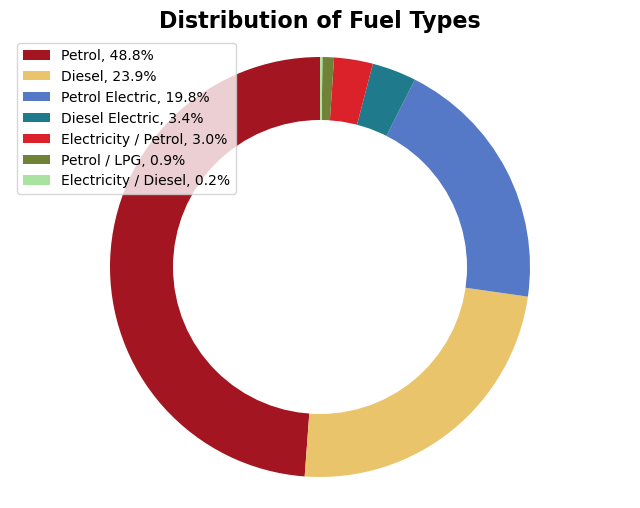

In [9]:
# Step 1: Get the data
data = df_emissions_clean.fuel.value_counts()
colors = ["#a31621", "#e9c46a", "#5579c6", "#1f7a8c", "#db222a", "#708238", "#a8e4a0"]
# Step 2: Make the canvas
plt.figure(figsize=(8, 6))

# Step 3: Make the plot
patches, texts = plt.pie(data, colors=colors, shadow=False, startangle=90)

# Step 3.5: Add in the donut hole
# draw circle
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# finding percentages
percentages = data.to_numpy() * 100 / data.to_numpy().sum()

# Step 4: Customizations
plt.title("Distribution of Fuel Types", fontweight="bold", fontsize=16)
plt.legend(patches, loc="best", labels = [f'{l}, {s:0.1f}%' for l, s in zip(data.index, percentages)])
plt.axis("equal")

# Step 5: Save/Show
plt.show()

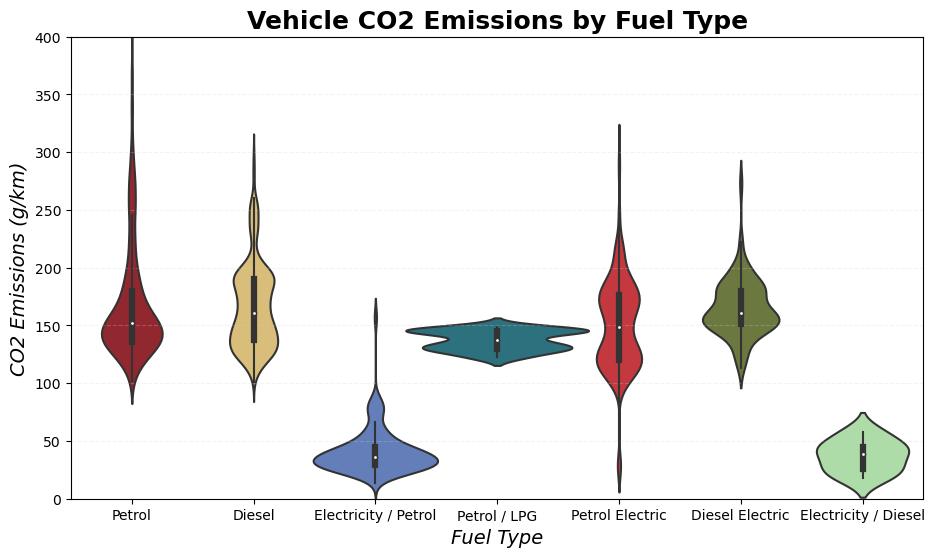

In [10]:

# get the data
data = df_emissions_clean

# create the plot
plt.figure(figsize=(11, 6))
                   
sns.violinplot(data, x="fuel", y="co2_emissions_gPERkm", width=1.5, palette=colors)

# customizations
plt.xlabel("Fuel Type", fontstyle="italic", fontsize=14)
plt.ylabel("CO2 Emissions (g/km)", fontstyle="italic", fontsize=14)
plt.title("Vehicle CO2 Emissions by Fuel Type", fontsize=18, fontweight="bold")
plt.ylim(0, 400)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

### Question 2: What is the effect of vehicle power (PS) on CO2 emissions (g/km)?

y = 0.29x + 104.83
The r-squared is: 0.419781404296731


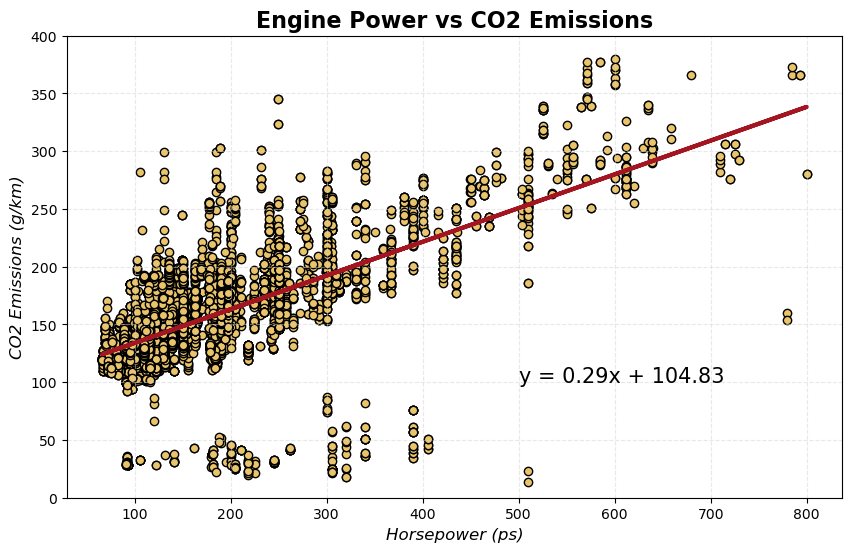

In [11]:
x_values = df_emissions_clean.power_ps
y_values = df_emissions_clean.co2_emissions_gPERkm

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="#e9c46a", edgecolor="black")
plt.plot(x_values, regress_values, "#A31621", linewidth=3)

# Step 4: Customizations
plt.xlabel("Horsepower (ps)", fontsize=12, fontstyle="italic")
plt.ylabel("CO2 Emissions (g/km)", fontsize=12, fontstyle="italic")
plt.title("Engine Power vs CO2 Emissions", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.ylim(0, 400)

plt.annotate(line_eq,(500, 100),fontsize=15,color="black")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [12]:
# Create bins for power ranges
power_bins = [1, 100, 200, 300, 400, 500, 600, 700, 800]
power_names = ["1-100", "101-200", "201-300", "301-400", "401-500", "501-600", "601-700", "701-800"]

In [13]:
# Add size ranges to DataFrame
df_emissions_clean["power_ranges"] = pd.cut(df_emissions_clean.power_ps, 
                                              bins=power_bins, labels=power_names, 
                                              include_lowest=True)

In [14]:
# empty lists for later...
emissions_list = []
emissions_summary = []

# for each engine size range...
for e_power in power_names:
    
    # if the vehicles engine size is in range locate the co2 emissions
    emissions = df_emissions_clean.loc[df_emissions_clean["power_ranges"] == e_power, "co2_emissions_gPERkm"]
    
    # It is now later. Append emission to a list
    emissions_list.append(emissions)
    
    # find mean of emissions
    emissions_mean = emissions.mean()

    # list 2: electric boogaloo
    emissions_summary.append(
        {
            "power_range": e_power,
            "emissions_mean": emissions_mean
        }
    )

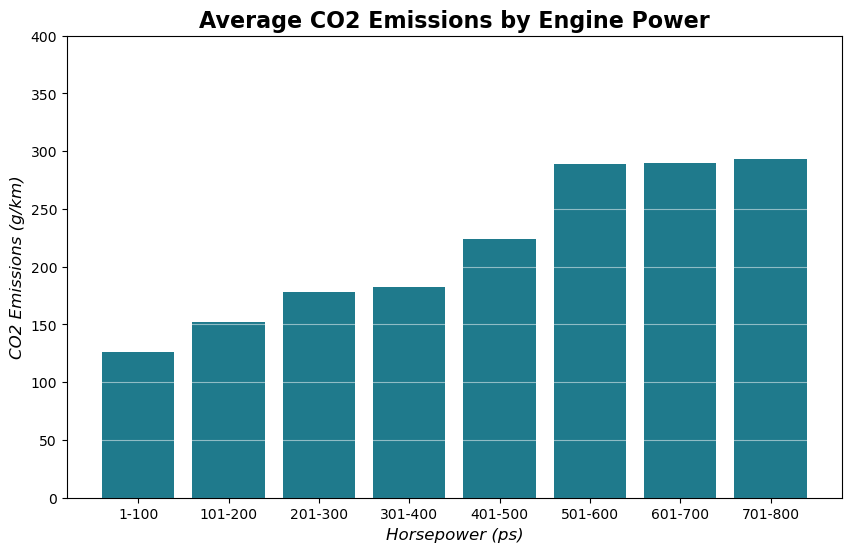

In [15]:
# Create graph
# Step 1: Get the data
x = pd.DataFrame(emissions_summary)["power_range"]
y = pd.DataFrame(emissions_summary)["emissions_mean"]


# Step 2: Create the canvas
plt.figure(figsize=(10,6))

# Step 3: Create the skeleton plot
plt.bar(x, y, color="#1f7a8c")

# Step 4: Customize graph
plt.xlabel("Horsepower (ps)", fontsize=12, fontstyle="italic")
plt.ylabel("CO2 Emissions (g/km)", fontsize=12, fontstyle="italic")
plt.title("Average CO2 Emissions by Engine Power", fontsize=16, fontweight="bold")
plt.ylim(0, 400)

plt.grid(axis="y", color="white", alpha=0.5)

# Step 5: Show/Save the plot
plt.show()

### Question 3: What is the effect of transmission type on CO2 emissions (g/km)?

C:\Users\willr\AppData\Local\Temp\ipykernel_17304\2013202291.py:23: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, loc="best", labels = [f'{l}, {s:0.1f}%' for l, s in zip(data.index, percentages)])


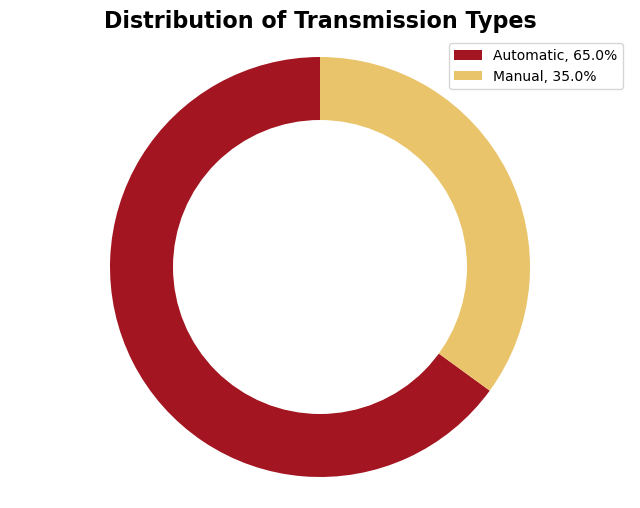

In [16]:
# Step 1: Get the data
data = df_emissions_clean.transmission_type.value_counts()
colors = ["#a31621", "#e9c46a", "#5579c6", "#1f7a8c", "#db222a", "#708238", "#a8e4a0"]
# Step 2: Make the canvas
plt.figure(figsize=(8, 6))

# Step 3: Make the plot
patches, texts = plt.pie(data, colors=colors, shadow=False, startangle=90)

# Step 3.5: Add in the donut hole
# draw circle
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(center_circle)

# finding percentages
percentages = data.to_numpy() * 100 / data.to_numpy().sum()

# Step 4: Customizations
plt.title("Distribution of Transmission Types", fontweight="bold", fontsize=16)
plt.legend(patches, loc="best", labels = [f'{l}, {s:0.1f}%' for l, s in zip(data.index, percentages)])
plt.axis("equal")

# Step 5: Save/Show
plt.show()

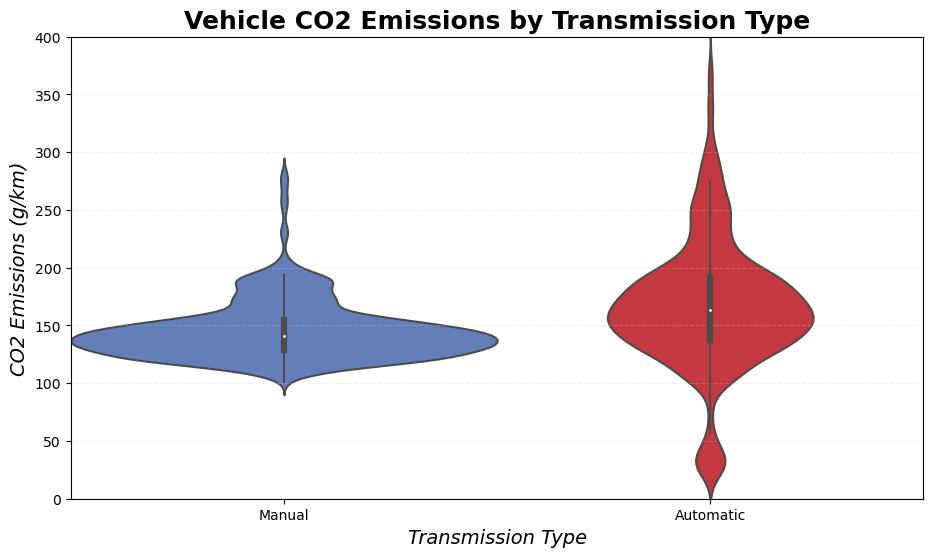

In [17]:
# get the data
data = df_emissions_clean

# create the plot
plt.figure(figsize=(11, 6))
                   
sns.violinplot(data, x="transmission_type", y="co2_emissions_gPERkm", width=1, palette=["#5579c6","#db222a"])

# customizations
plt.xlabel("Transmission Type", fontstyle="italic", fontsize=14)
plt.ylabel("CO2 Emissions (g/km)", fontstyle="italic", fontsize=14)
plt.title("Vehicle CO2 Emissions by Transmission Type", fontsize=18, fontweight="bold")
plt.ylim(0, 400)

plt.grid(color="lightgrey", axis="y", linestyle="--", alpha=0.25)

# show
plt.show()

### Question 4: What is the effect of engine size (cm^3) on CO2 emissions (g/km)?

y = 0.04x + 81.02
The r-squared is: 0.47182061389139746


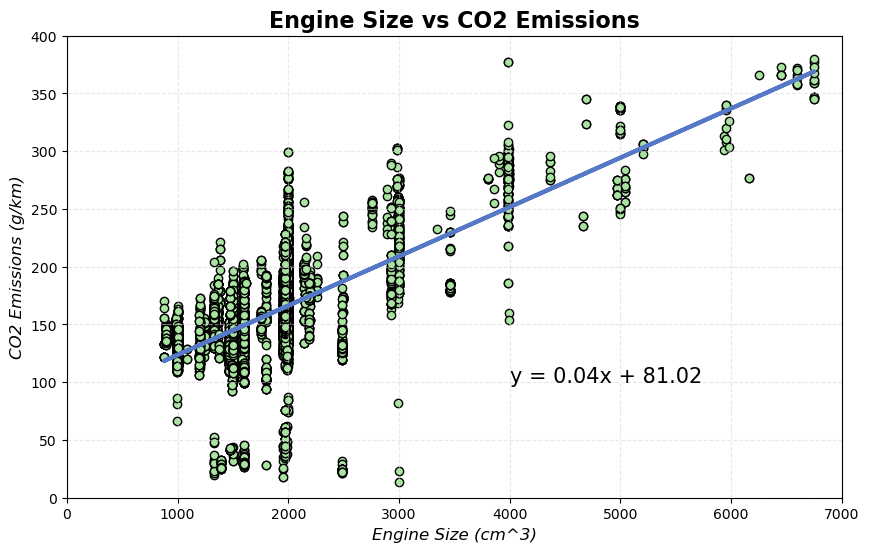

In [18]:
x_values = df_emissions_clean.engine_size_cm3
y_values = df_emissions_clean.co2_emissions_gPERkm

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(10, 6))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="#a8e4a0", edgecolor="black")
plt.plot(x_values, regress_values, "#5579c6", linewidth=3)

# Step 4: Customizations
plt.xlabel("Engine Size (cm^3)", fontsize=12, fontstyle="italic")
plt.ylabel("CO2 Emissions (g/km)", fontsize=12, fontstyle="italic")
plt.title("Engine Size vs CO2 Emissions", fontweight="bold", fontsize=16)
plt.grid(color="lightgrey", linestyle = "--", alpha=0.5)
plt.ylim(0, 400)
plt.xlim(0, 7000)

plt.annotate(line_eq,(4000, 100),fontsize=15,color="black")

print(f"The r-squared is: {rvalue**2}")
plt.show()

In [19]:
# Create bins for engine size ranges
size_bins = [1, 1000, 2000, 3000, 4000, 5000, 6000, 7000]
size_names = ["1-1k", "1001-2k", "2001-3k", "3001-4k", "4001-5k", "5001-6k", "6001-7k"]

In [20]:
# Add size ranges to DataFrame
df_emissions_clean["size_ranges"] = pd.cut(df_emissions_clean.engine_size_cm3, 
                                              bins=size_bins, labels=size_names, 
                                              include_lowest=True)

In [21]:
# empty lists for later...
emissions_list = []
emissions_summary = []

# for each engine size range...
for e_size in size_names:
    
    # if the vehicles engine size is in range locate the co2 emissions
    emissions = df_emissions_clean.loc[df_emissions_clean["size_ranges"] == e_size, "co2_emissions_gPERkm"]
    
    # It is now later. Append emission to a list
    emissions_list.append(emissions)
    
    # find mean of emissions
    emissions_mean = emissions.mean()

    # list 2: electric boogaloo
    emissions_summary.append(
        {
            "size_range": e_size,
            "emissions_mean": emissions_mean
        }
    )

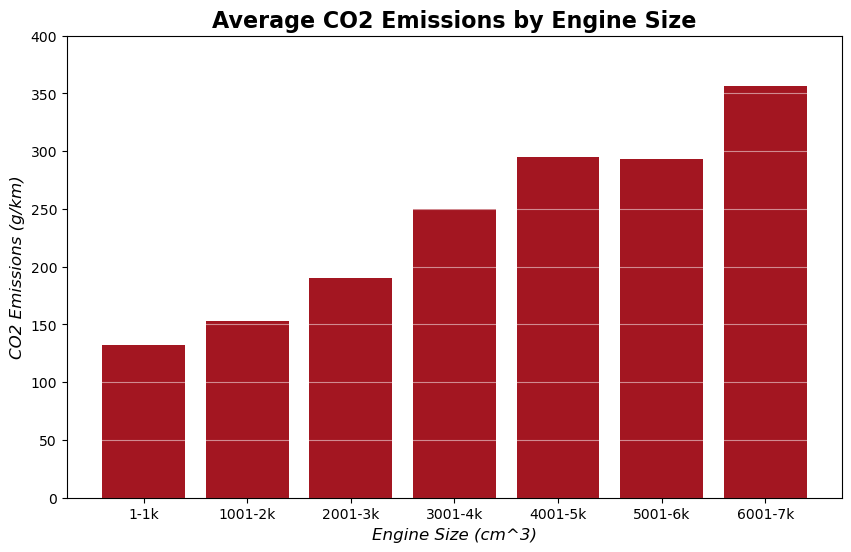

In [22]:
# Create graph
# Step 1: Get the data
x = pd.DataFrame(emissions_summary)["size_range"]
y = pd.DataFrame(emissions_summary)["emissions_mean"]


# Step 2: Create the canvas
plt.figure(figsize=(10,6))

# Step 3: Create the skeleton plot
plt.bar(x, y, color="#a31621")

# Step 4: Customize graph
plt.xlabel("Engine Size (cm^3)", fontsize=12, fontstyle="italic")
plt.ylabel("CO2 Emissions (g/km)", fontsize=12, fontstyle="italic")
plt.title("Average CO2 Emissions by Engine Size", fontsize=16, fontweight="bold")
plt.ylim(0, 400)

plt.grid(axis="y", color="white", alpha=0.5)

# Step 5: Show/Save the plot
plt.show()